In [1]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_content(file_path: str):
    with open(file_path, "r") as file_handle:
        return file_handle.read()


data = pd.DataFrame([
    json.loads(row)
    for file in os.listdir()
    if file.startswith("benchmark-outputs")
    for row in get_content(file_path=file).splitlines()
])
data["duration"] = pd.to_numeric(data.duration)
data

,tag,res,duration
0,c,22044 primes found from 250001 iters in 3.0781...,3.078125
1,py-naive,22044 primes found from 250001 iters in 42.688...,42.688500
2,py-ctypes,22044 primes found from 250001 iters in 3.1677...,3.167700
3,py-numba,22044 primes found from 250001 iters in 3.8786...,3.878600
4,py-cython-naive,22044 primes found from 250001 iters in 32.450...,32.450500
5,py-cython,22044 primes found from 250001 iters in 2.4288...,2.428800
6,c,22044 primes found from 250001 iters in 3.0468...,3.046875
7,py-naive,22044 primes found from 250001 iters in 41.654...,41.654700
8,py-ctypes,22044 primes found from 250001 iters in 3.0803...,3.080300
9,py-numba,22044 primes found from 250001 iters in 3.7703...,3.770300


In [9]:
pd.options.display.float_format = '{:,.2f}'.format

summary = data.groupby("tag").duration.agg(
    samples=len,
    min_duration=min,
    average_duration=np.mean,
    max_duration=max
).sort_values("average_duration", ascending=False).reset_index()

summary

,tag,samples,min_duration,average_duration,max_duration
0,py-naive,10.00,41.60,41.94,42.69
1,py-cython-naive,10.00,32.15,32.41,32.94
2,py-numba,10.00,3.72,3.76,3.88
3,py-ctypes,10.00,3.04,3.08,3.17
4,c,10.00,3.05,3.06,3.08
5,py-cython,10.00,2.40,2.42,2.44


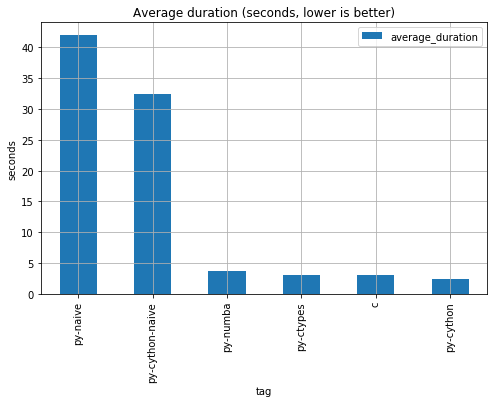

In [4]:
summary.plot.bar(
    x="tag",
    y="average_duration",
    title="Average duration (seconds, lower is better)",
    figsize=(8, 5),
    grid=True
)

plt.ylabel("seconds")
plt.show()